# Análisis de resultados

En este notebook se hace el análisis de los resultados obtenidos con cada uno de los algoritmos, así como también sus rendimientos.

### Visualización general de los resultados

Vamos a comenzar cargando los archivos csv que contienen los resultados guardados en main.py. Para la visualización de los resultados vamos a utilizar los itemsets frecuentes encontrados con un soporte mínimo del 2.5%, que es el valor que dió una cantidad decente de resultados.

En este caso los resultados son del análisis completo del dataset original, con todas las transacciones y todos los productos.

In [60]:
import pandas as pd

df_eclat = pd.read_csv('results/eclat_0.025_None_None.csv')
df_eclat['itemsets'] = df_eclat["itemsets"].apply(eval)
df_apriori = pd.read_csv('results/apriori_0.025_None_None.csv')
df_apriori['itemsets'] = df_apriori["itemsets"].apply(eval)
df_fp_growth = pd.read_csv('results/fp_growth_0.015_None_None.csv')
df_fp_growth['itemsets'] = df_fp_growth["itemsets"].apply(eval)

La cantidad de itemsets frecuentes encontrados son los mismos para todos los algoritmos.

In [61]:
print(f"ECLAT: {df_eclat.shape}")
print(f"APRIORI: {df_apriori.shape}")
print(f"FP-GROWTH: {df_fp_growth.shape}")

ECLAT: (229, 2)
APRIORI: (229, 2)
FP-GROWTH: (757, 2)


Los datasets cuentan con una columna de support y otra con el frozenset del conjunto de items. Lo hicimos de este modo también en ECLAT para mantener el formato de mlxtend.

In [62]:
df_eclat.head()

,support,itemsets
0,0.039549,(23355)
1,0.027917,(23293)
2,0.036211,(23344)
3,0.028423,(23322)
4,0.031811,(23321)


In [63]:
type(df_eclat['itemsets'].iloc[0])

frozenset

Generemos entonces las reglas de asociación para cada algoritmo, que deberían ser iguales.

In [64]:
from mlxtend.frequent_patterns import association_rules

def generate_rules(df):
    rules = association_rules(df, metric="lift", min_threshold=1)
    return rules.sort_values('lift', ascending=False)

df_eclat_rules = generate_rules(df_eclat)
df_apriori_rules = generate_rules(df_apriori)
df_fp_growth_rules = generate_rules(df_fp_growth)

In [65]:
df_eclat_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
16,(22698),"(22697, 22699)",0.038689,0.038790,0.027361,0.707190,18.231107,1.0,0.025860,3.282703,0.983187,0.545913,0.695373,0.706268
13,"(22697, 22699)",(22698),0.038790,0.038689,0.027361,0.705346,18.231107,1.0,0.025860,3.262502,0.983291,0.545913,0.693487,0.706268
14,"(22698, 22699)",(22697),0.030243,0.051231,0.027361,0.904682,17.658719,1.0,0.025811,9.953747,0.972791,0.505607,0.899535,0.719370
15,(22697),"(22698, 22699)",0.051231,0.030243,0.027361,0.534057,17.658719,1.0,0.025811,2.081279,0.994311,0.505607,0.519526,0.719370
11,(22698),(22697),0.038689,0.051231,0.031963,0.826144,16.125707,1.0,0.029981,5.457202,0.975738,0.551483,0.816756,0.725017


In [66]:
df_apriori_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
86,(22698),"(22697, 22699)",0.038689,0.038790,0.027361,0.707190,18.231107,1.0,0.025860,3.282703,0.983187,0.545913,0.695373,0.706268
83,"(22697, 22699)",(22698),0.038790,0.038689,0.027361,0.705346,18.231107,1.0,0.025860,3.262502,0.983291,0.545913,0.693487,0.706268
84,"(22698, 22699)",(22697),0.030243,0.051231,0.027361,0.904682,17.658719,1.0,0.025811,9.953747,0.972791,0.505607,0.899535,0.719370
85,(22697),"(22698, 22699)",0.051231,0.030243,0.027361,0.534057,17.658719,1.0,0.025811,2.081279,0.994311,0.505607,0.519526,0.719370
59,(22698),(22697),0.038689,0.051231,0.031963,0.826144,16.125707,1.0,0.029981,5.457202,0.975738,0.551483,0.816756,0.725017


In [67]:
df_fp_growth_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
712,(23170),(23171),0.022505,0.019269,0.016133,0.716854,37.203026,1.0,0.015699,3.463694,0.995525,0.629191,0.711291,0.777062
713,(23171),(23170),0.019269,0.022505,0.016133,0.837270,37.203026,1.0,0.015699,6.006862,0.992240,0.629191,0.833524,0.777062
5,(22748),(22745),0.022050,0.021393,0.015830,0.717890,33.557535,1.0,0.015358,3.468884,0.992076,0.573260,0.711723,0.728921
4,(22745),(22748),0.021393,0.022050,0.015830,0.739953,33.557535,1.0,0.015358,3.760661,0.991409,0.573260,0.734089,0.728921
225,(21094),(21086),0.026653,0.021646,0.017701,0.664137,30.682181,1.0,0.017124,2.912953,0.993898,0.578512,0.656706,0.740947


Que sean iguales con el mismo soporte mínimo nos demuestra que nuestro algoritmo de eclat está funcionando correctamente.

Las reglas de asociación nos ayudan a identificar relaciones donde "si se da el antecendente, entonces sucede el consecuente". En este caso, para la primera regla, podemos decir que: si una persona compra el producto de código 22698, entonces posiblemente compre los productos de códigos 22697 y 22699.

Además, las métricas nos ayudan a analizar que tan buena es esa regla.

- El support de 2.7% indica el porcentaje de facturas totales donde los productos 22697, 22699 y 22698 aparecen juntos.
- El confidence de 70% indica qué tan a menudo los ítems 22697 y 22699 aparecen en las transacciones que contienen a 22698. Es decir, el 70% de las veces que se compra 22697 y 22699, también se compra 22698.
- Mientras que lift mide cuánto más probable es que el consecuente ocurra junto con el antecedente, en comparación con su probabilidad de ocurrir de forma independiente. En este caso, un lift de 18 indica que hay una gran correlación positiva.

Podemos ver las visualizaciones brindadas en el repositorio del github de la materia.

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(rules, frequent_itemsets):
    # ===== VISUALIZACIONES =====

    # 1. Distribución del soporte de los conjuntos frecuentes
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.hist(frequent_itemsets['support'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribución del Soporte')
    plt.xlabel('Soporte')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

    # 2. Top 10 conjuntos frecuentes por soporte
    plt.subplot(2, 3, 2)
    top_itemsets = frequent_itemsets.nlargest(10, 'support')
    plt.barh(range(len(top_itemsets)), top_itemsets['support'], color='lightcoral')
    plt.yticks(range(len(top_itemsets)), [str(items)[:30] + '...' if len(str(items)) > 30 else str(items) 
                                        for items in top_itemsets['itemsets']])
    plt.title('Top 10 Conjuntos Frecuentes')
    plt.xlabel('Soporte')
    plt.gca().invert_yaxis()

    # 3. Distribución de la confianza
    plt.subplot(2, 3, 3)
    plt.hist(rules['confidence'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Distribución de la Confianza')
    plt.xlabel('Confianza')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

    # 4. Distribución del lift
    plt.subplot(2, 3, 4)
    plt.hist(rules['lift'], bins=30, alpha=0.7, color='gold', edgecolor='black')
    plt.title('Distribución del Lift')
    plt.xlabel('Lift')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

    # 5. Scatter plot: Confianza vs Soporte
    plt.subplot(2, 3, 5)
    plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
    plt.colorbar(label='Lift')
    plt.title('Confianza vs Soporte (coloreado por Lift)')
    plt.xlabel('Soporte')
    plt.ylabel('Confianza')
    plt.grid(True, alpha=0.3)

    # 6. Top 10 reglas por lift
    plt.subplot(2, 3, 6)
    top_rules = rules.head(10)
    plt.barh(range(len(top_rules)), top_rules['lift'], color='mediumpurple')
    plt.yticks(range(len(top_rules)), [f"{str(rule)[:25]}..." if len(str(rule)) > 25 else str(rule) 
                                    for rule in top_rules.index])
    plt.title('Top 10 Reglas por Lift')
    plt.xlabel('Lift')
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

    # ===== ANÁLISIS ADICIONAL =====

    # 7. Análisis de la longitud de los conjuntos frecuentes
    plt.figure(figsize=(15, 10))

    # Contar longitud de itemsets
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
    length_counts = frequent_itemsets['length'].value_counts().sort_index()

    plt.subplot(2, 3, 1)
    plt.bar(length_counts.index, length_counts.values, color='coral')
    plt.title('Distribución por Longitud de Conjuntos')
    plt.xlabel('Número de Items')
    plt.ylabel('Cantidad de Conjuntos')
    plt.grid(True, alpha=0.3)

    # 8. Soporte promedio por longitud
    plt.subplot(2, 3, 2)
    avg_support_by_length = frequent_itemsets.groupby('length')['support'].mean()
    plt.bar(avg_support_by_length.index, avg_support_by_length.values, color='lightblue')
    plt.title('Soporte Promedio por Longitud')
    plt.xlabel('Número de Items')
    plt.ylabel('Soporte Promedio')
    plt.grid(True, alpha=0.3)

    # 9. Heatmap de correlación entre métricas
    plt.subplot(2, 3, 3)
    correlation_matrix = rules[['support', 'confidence', 'lift', 'leverage', 'conviction']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlación entre Métricas')

    # 10. Análisis de reglas por rangos de lift
    plt.subplot(2, 3, 4)
    lift_ranges = pd.cut(rules['lift'], bins=[0, 1, 2, 5, 10, 100], labels=['0-1', '1-2', '2-5', '5-10', '10+'])
    lift_dist = lift_ranges.value_counts()
    plt.pie(lift_dist.values, labels=lift_dist.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Reglas por Rango de Lift')

    # 11. Análisis de reglas por rangos de confianza
    plt.subplot(2, 3, 5)
    conf_ranges = pd.cut(rules['confidence'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                        labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])
    conf_dist = conf_ranges.value_counts()
    plt.pie(conf_dist.values, labels=conf_dist.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Reglas por Rango de Confianza')

    # 12. Gráfico de dispersión 3D (Soporte, Confianza, Lift)
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.subplot(2, 3, 6, projection='3d')
    scatter = ax.scatter(rules['support'], rules['confidence'], rules['lift'], 
                        c=rules['lift'], cmap='viridis', alpha=0.6)
    ax.set_xlabel('Soporte')
    ax.set_ylabel('Confianza')
    ax.set_zlabel('Lift')
    ax.set_title('Reglas en 3D')
    plt.colorbar(scatter, ax=ax, label='Lift')

    plt.tight_layout()
    plt.show()

    # ===== RESUMEN ESTADÍSTICO =====
    print("\n" + "="*50)
    print("RESUMEN ESTADÍSTICO DE LAS REGLAS DE ASOCIACIÓN")
    print("="*50)

    print(f"\nTotal de conjuntos frecuentes: {len(frequent_itemsets)}")
    print(f"Total de reglas generadas: {len(rules)}")
    print(f"Conjuntos de 1 item: {len(frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == 1])}")
    print(f"Conjuntos de 2 items: {len(frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == 2])}")
    print(f"Conjuntos de 3+ items: {len(frequent_itemsets[frequent_itemsets['itemsets'].apply(len) >= 3])}")

    print(f"\nEstadísticas de las reglas:")
    print(f"Confianza promedio: {rules['confidence'].mean():.4f}")
    print(f"Lift promedio: {rules['lift'].mean():.4f}")
    print(f"Soporte promedio: {rules['support'].mean():.4f}")

    print(f"\nTop 5 reglas más fuertes (por lift):")
    for i, (idx, rule) in enumerate(rules.head().iterrows(), 1):
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        print(f"{i}. {antecedents} → {consequents}")
        print(f"   Lift: {rule['lift']:.3f}, Confianza: {rule['confidence']:.3f}, Soporte: {rule['support']:.3f}")


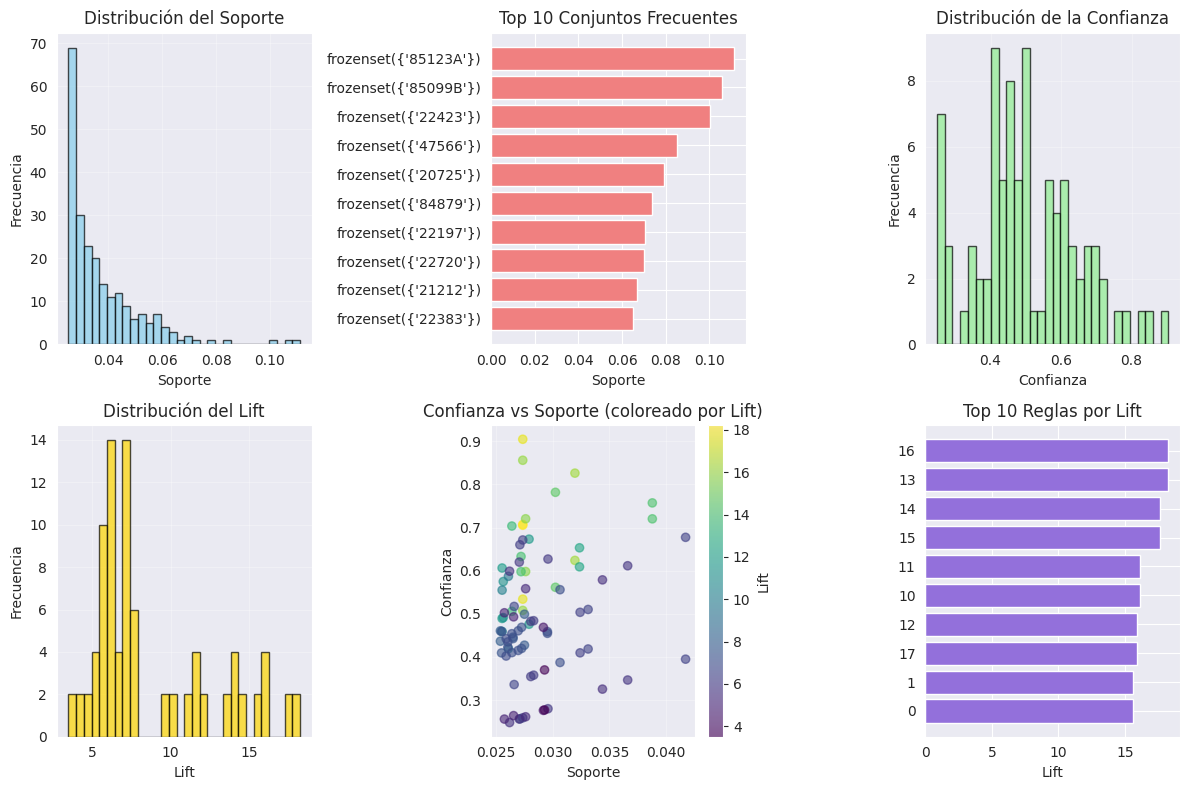

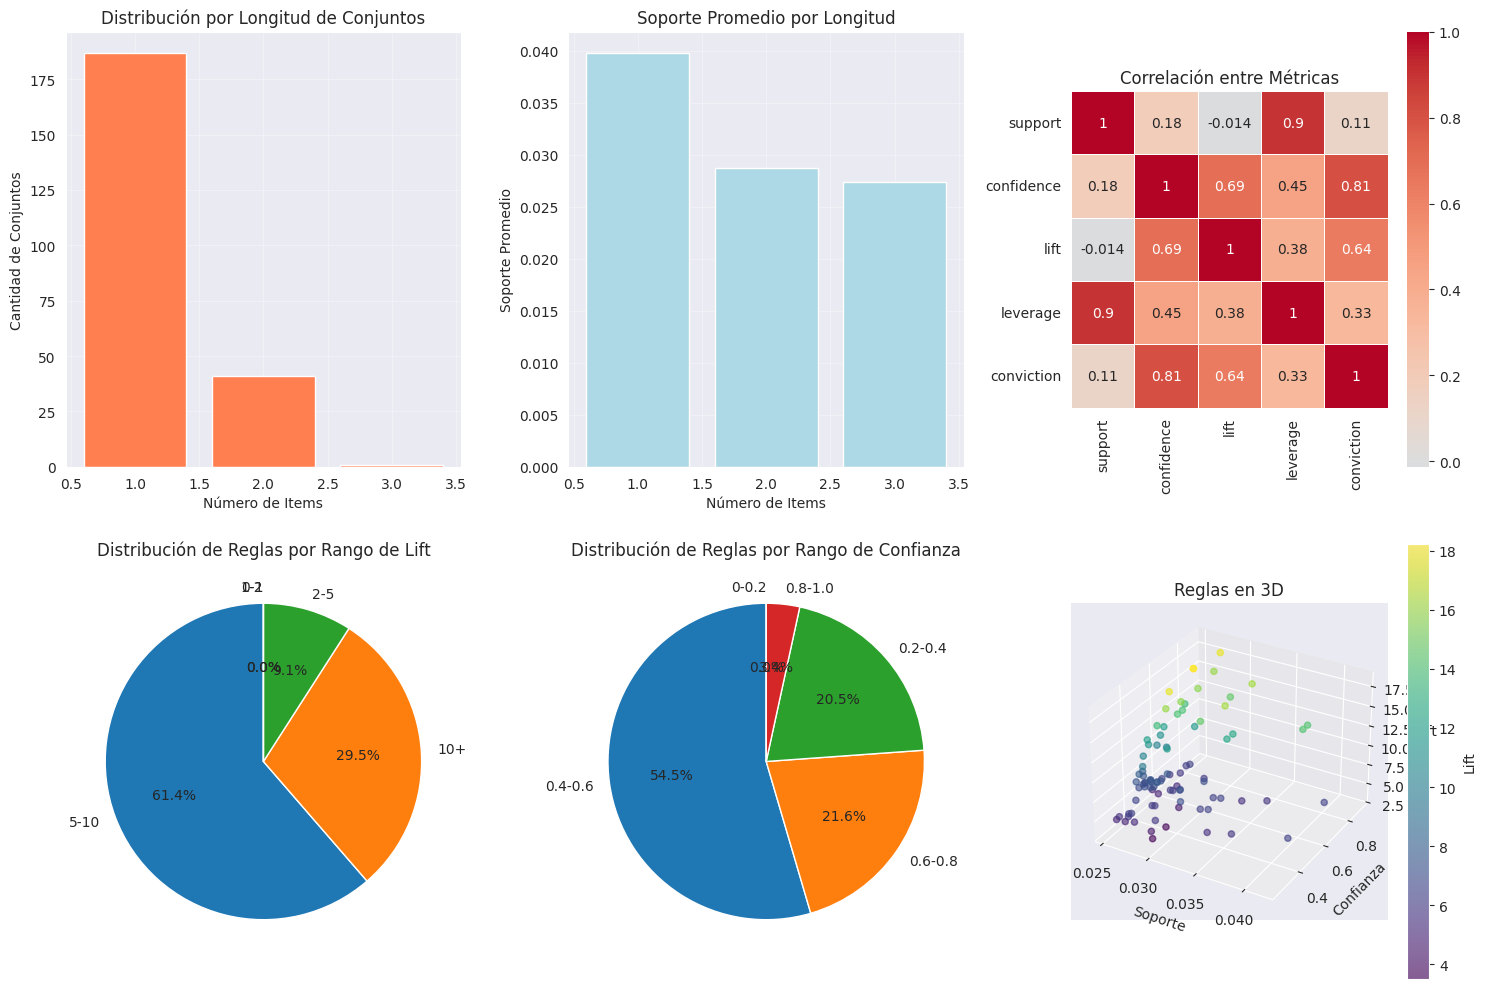


RESUMEN ESTADÍSTICO DE LAS REGLAS DE ASOCIACIÓN

Total de conjuntos frecuentes: 229
Total de reglas generadas: 88
Conjuntos de 1 item: 187
Conjuntos de 2 items: 41
Conjuntos de 3+ items: 1

Estadísticas de las reglas:
Confianza promedio: 0.5013
Lift promedio: 8.8083
Soporte promedio: 0.0287

Top 5 reglas más fuertes (por lift):
1. ['22698'] → ['22697', '22699']
   Lift: 18.231, Confianza: 0.707, Soporte: 0.027
2. ['22697', '22699'] → ['22698']
   Lift: 18.231, Confianza: 0.705, Soporte: 0.027
3. ['22698', '22699'] → ['22697']
   Lift: 17.659, Confianza: 0.905, Soporte: 0.027
4. ['22697'] → ['22698', '22699']
   Lift: 17.659, Confianza: 0.534, Soporte: 0.027
5. ['22698'] → ['22697']
   Lift: 16.126, Confianza: 0.826, Soporte: 0.032


In [69]:
plot_results(df_eclat_rules, df_eclat)

Analicemos, por ejemplo, las que tienen una confianza mayor al 70%.

In [70]:
df_eclat_rules[df_eclat_rules['confidence'] > 0.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
16,(22698),"(22697, 22699)",0.038689,0.038790,0.027361,0.707190,18.231107,1.0,0.025860,3.282703,0.983187,0.545913,0.695373,0.706268
13,"(22697, 22699)",(22698),0.038790,0.038689,0.027361,0.705346,18.231107,1.0,0.025860,3.262502,0.983291,0.545913,0.693487,0.706268
14,"(22698, 22699)",(22697),0.030243,0.051231,0.027361,0.904682,17.658719,1.0,0.025811,9.953747,0.972791,0.505607,0.899535,0.719370
11,(22698),(22697),0.038689,0.051231,0.031963,0.826144,16.125707,1.0,0.029981,5.457202,0.975738,0.551483,0.816756,0.725017
12,"(22697, 22698)",(22699),0.031963,0.053861,0.027361,0.856013,15.892900,1.0,0.025639,6.570985,0.968019,0.467993,0.847816,0.681997
1,(23300),(23301),0.038335,0.046174,0.027613,0.720317,15.600023,1.0,0.025843,3.410378,0.973205,0.485333,0.706777,0.659173
18,(22698),(22699),0.038689,0.053861,0.030243,0.781699,14.513184,1.0,0.028159,4.334108,0.968570,0.485390,0.769272,0.671601
31,(22699),(22697),0.053861,0.051231,0.038790,0.720188,14.057525,1.0,0.036031,3.390733,0.981742,0.585050,0.705079,0.738672
30,(22697),(22699),0.051231,0.053861,0.038790,0.757157,14.057525,1.0,0.036031,3.896091,0.979020,0.585050,0.743333,0.738672
20,(22356),(20724),0.037526,0.052192,0.026400,0.703504,13.479056,1.0,0.024441,3.196697,0.961907,0.416933,0.687177,0.604659


La mayoría tienen que ver con los mismos productos dispuestos como antecedentes o consecuentes y agrupados de distintas maneras. Veamos cuales son esos productos.

In [71]:
retail_df = pd.read_excel('data/online_retail_2.xlsx')
products_df = retail_df.groupby('StockCode')['Description'].first().reset_index()

In [72]:
products_df[products_df['StockCode'].isin([22697, 22698, 22699])]

,StockCode,Description
1531,22697,GREEN REGENCY TEACUP AND SAUCER
1532,22698,PINK REGENCY TEACUP AND SAUCER
1533,22699,ROSES REGENCY TEACUP AND SAUCER


Estos tres productos, por ejemplo, corresponden a un hermoso juego de tazas con motivos floreados para tomer el té. La gente que compra una generalmete también compra las otras, por lo que ya sabemos que recomendar cómo próxima compra a los que agreguen al carrito una de estas tazas.

Es interesante también como las mismas también cambian entre de lugar en las reglas, siendo antecedentes o consecuentes y manteniendo muy buenos niveles en las métricas. Claramente hay una gran relación entre ellas y responden a un muy buen conjunto para tener en cuenta a la hora de recomendaciones.

In [73]:
products_df[products_df['StockCode'].isin([23300, 23301])]

,StockCode,Description
2104,23300,GARDENERS KNEELING PAD CUP OF TEA
2105,23301,GARDENERS KNEELING PAD KEEP CALM


En este caso tenemos alguna especie de pads para apoyar las rodillas en el jardín ¿?. Parece ser que mucha gente los compra juntos, pero hay algo particular. A diferencia del caso anterior, la regla no aparece en las dos direcciones.

Veamos que tan buena es la relación en la otra dirección.

In [74]:
df_eclat_rules[df_eclat_rules["antecedents"].apply(lambda fs: {'23301'}.issubset(fs))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(23301),(23300),0.046174,0.038335,0.027613,0.598028,15.600023,1.0,0.025843,2.392371,0.981204,0.485333,0.582005,0.659173


La regla sigue siendo buena, sin embargo su confidence es más bajo. Esto significa que, el pad de keep calm aparece más veces en solitario que el de cup of tea.

In [75]:
products_df[products_df['StockCode'].isin([22356, 20724])]

,StockCode,Description
102,20724,RED RETROSPOT CHARLOTTE BAG
1214,22356,CHARLOTTE BAG PINK POLKADOT


Y esos de arriba son los productos de la última regla. Dos bolsos con motivos.

### Análisis de rendimiento

Primero queremos aclarar porque usamos una implementación propia de Eclat. Esto se debe a que la implementación del paquete pyECLAT por algún motivo no terminaba de ejecutar incluso después de horas. Por ese motivo, y entendiendo que había un error, decidimos hacer una implementación rápida nosotros mismos. Esto obviamente genera algunas cuestiones de discrepancia con respecto al benchmark, nuestro algoritmo está implementado de manera diferente al de mlxtend, probablemente usando otros métodos y estructuras de datos.

A pesar de ello vamos a evaluar entonces el rendimiento de los modelos con diferentes valores de min support o transacciones.

Todos los datos de las ejecuciones fueron guardados en el archivo "benchmark.csv" en la carpeta de resultados. En ellos se expone la información necesaria para el análisis de uso de recursos.

In [76]:
benchmark_df = pd.read_csv('results/benchmark.csv')
benchmark_df.head()

,Total_RAM_GB,Hostname,OS,CPU,Logical_CPUs,Physical_CPUs,Algorithm,Min_Support,Is_Data_Sample,Max_Transactions,...,len_1,len_2,len_3,len_4,Duration_s,User_Time_s,Sys_Time_s,RSS_Memory_KB,Peak_Memory_MB,Peak_Tracked_Bytes
0,16.7,debian,Linux,NaN,6,6,apriori,0.02,False,19773,...,NaN,NaN,NaN,NaN,2.8451,1.93,0.45,3575828,2963.32,2626234319
1,16.7,debian,Linux,NaN,6,6,apriori,0.02,True,1000,...,NaN,NaN,NaN,NaN,4.0420,3.37,0.10,3576116,627.04,256929299
2,16.7,debian,Linux,NaN,6,6,apriori,0.30,True,1000,...,NaN,NaN,NaN,NaN,0.9482,0.14,0.02,3576832,449.88,702693
3,16.7,debian,Linux,NaN,6,6,apriori,0.10,True,1000,...,NaN,NaN,NaN,NaN,0.9461,0.15,0.02,3577008,456.92,706006
4,16.7,debian,Linux,NaN,6,6,apriori,0.10,True,1000,...,6.0,0.0,0.0,0.0,0.9789,0.16,0.03,3721416,447.26,673077


## Observando un itemset de 4 elementos.

Con fp growth con un min support de 0.015 encontramos este item set:

```
frozenset({'22698', '22697', '22423', '22699'})
```

Veamos los elementos:

In [77]:
products_df[products_df['StockCode'].isin([22698, 22697, 22423, 22699])]

,StockCode,Description
1271,22423,REGENCY CAKESTAND 3 TIER
1531,22697,GREEN REGENCY TEACUP AND SAUCER
1532,22698,PINK REGENCY TEACUP AND SAUCER
1533,22699,ROSES REGENCY TEACUP AND SAUCER


Ahora analicemos Sporte, Confianza y Lift de los productos

In [83]:
# Conjunto de productos a filtrar
filter_items = {"22698", "22697", "22423", "22699"}

# Filtrar reglas que contengan alguno de los productos en antecedents o consequents
mask = df_fp_growth_rules.apply(
    lambda row: len(filter_items & row["antecedents"]) > 0 or len(filter_items & row["consequents"]) > 0,
    axis=1
)

filtered_rules = df_fp_growth_rules[mask]

In [82]:
if not filtered_rules.empty:
    metrics = {
        "total_rules": len(filtered_rules),
        "avg_support": filtered_rules["support"].mean(),
        "avg_confidence": filtered_rules["confidence"].mean(),
        "avg_lift": filtered_rules["lift"].mean(),
        "max_lift_rule": filtered_rules.loc[filtered_rules["lift"].idxmax()].to_dict(),
        "max_confidence_rule": filtered_rules.loc[filtered_rules["confidence"].idxmax()].to_dict()
    }

    print("=== Métricas de las reglas filtradas ===")
    print(f"Total de reglas: {metrics['total_rules']}")
    print(f"Soporte promedio: {metrics['avg_support']:.4f}")
    print(f"Confianza promedio: {metrics['avg_confidence']:.4f}")
    print(f"Lift promedio: {metrics['avg_lift']:.4f}")
    print("\nRegla con mayor Lift:")
    print(metrics["max_lift_rule"])
    print("\nRegla con mayor Confianza:")
    print(metrics["max_confidence_rule"])
else:
    print("No se encontraron reglas con esos productos.")

=== Métricas de las reglas filtradas ===
Total de reglas: 60
Soporte promedio: 0.0204
Confianza promedio: 0.4903
Lift promedio: 11.7490

Regla con mayor Lift:
{'antecedents': frozenset({'22697', '22699'}), 'consequents': frozenset({'22423', '22698'}), 'antecedent support': 0.0387902695595003, 'consequent support': 0.0198250139078541, 'support': 0.015222778536388, 'confidence': 0.3924380704041722, 'lift': 19.795096852300293, 'representativity': 1.0, 'leverage': 0.014453760902881497, 'conviction': 1.6132923054349273, 'zhangs_metric': 0.9877994464416379, 'jaccard': 0.35081585081585126, 'certainty': 0.38014952613908976, 'kulczynski': 0.5801476066306583}

Regla con mayor Confianza:
{'antecedents': frozenset({'22423', '22698', '22699'}), 'consequents': frozenset({'22697'}), 'antecedent support': 0.0167399989885197, 'consequent support': 0.0512314772669802, 'support': 0.015222778536388, 'confidence': 0.9093655589123864, 'lift': 17.750133461376727, 'representativity': 1.0, 'leverage': 0.014365

Vemos que entre los 4 poseen un lift muy cercano al del top 5. Salvo la confianza y el soporte. Estos dos ultimos estadisticos se pueden tomar con pinzas por la siguiente observacion:

Si vemos el top de reglas mas fuertes por lift del comienzo observaremos que se tratan de los mismos productos pero con la excepcion de un cuarto: el producto 22423 (REGENCY CAKESTAND 3 TIER). Por lo tanto, esta transaccion refleja una asociacion fuerte entre productos y una oportunidad de negocios clave. De hecho, la regla con mayor confianza incluye como antecedente al Cakestand.

Investigando sobre los tipos de producto se tratan de los siguientes:

<p>
  <img src="22423.jpeg" alt="Texto alternativo" width="200"/>
  <img src="22697.jpeg" alt="Texto alternativo" width="200"/>
  <img src="22698.jpg" alt="Texto alternativo" width="200"/>
  <img src="22699.jpg" alt="Texto alternativo" width="200"/>
</p>

## Estrategia de marketing

Los clientes suelen llevar tazas y de vez en cuando compran un stand para colocarlas. Por lo tanto, como una primera recomendacion de marketing podemos realizar una promocion con estos productos.

<p>
  <img src="flyer.png" alt="Texto alternativo" width="500"/>
</p>